In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [229]:
df = pd.read_csv('earthquakes_nepal_data.csv')

In [230]:
df.sample(3)

,date,time,latitude,longitude,magnitude,epicenter,BS_date,AD_date,Local_time,UTC_time,AD_UTC,BS_Local,AD_Local,AD_UTC_dt,AD_Local_dt
728,B.S.: 2072-02-20A.D.: 2015-06-03,Local: 13:37UTC: 07:52,27.79,85.87,4.5,Sindhupalchowk,2/20/2072,6/3/2015,13:37,7:52,6/3/2015 7:52,2/20/2072 13:37,6/3/2015 13:37,6/3/2015 7:52,6/3/2015 13:37
194,B.S.: 2061-12-16A.D.: 2005-03-29,Local: 07:06UTC: 01:21,28.15,84.37,4.0,Lamjung,12/16/2061,3/29/2005,7:06,1:21,3/29/2005 1:21,12/16/2061 7:06,3/29/2005 7:06,3/29/2005 1:21,3/29/2005 7:06
852,B.S.: 2072-08-06A.D.: 2015-11-22,Local: 07:11UTC: 01:26,28.43,83.30,4.1,Myagdi,8/6/2072,11/22/2015,7:11,1:26,11/22/2015 1:26,8/6/2072 7:11,11/22/2015 7:11,11/22/2015 1:26,11/22/2015 7:11


In [231]:
df.dtypes

date            object
time            object
latitude       float64
longitude      float64
magnitude      float64
epicenter       object
BS_date         object
AD_date         object
Local_time      object
UTC_time        object
AD_UTC          object
BS_Local        object
AD_Local        object
AD_UTC_dt       object
AD_Local_dt     object
dtype: object

In [232]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicates_with_index = duplicate_rows.reset_index()
print(duplicates_with_index)

Empty DataFrame
Columns: [index, date, time, latitude, longitude, magnitude, epicenter, BS_date, AD_date, Local_time, UTC_time, AD_UTC, BS_Local, AD_Local, AD_UTC_dt, AD_Local_dt]
Index: []


In [233]:
from collections import Counter

data = []
for place in df['epicenter'].dropna().tolist():   # drop missing values
    for word in place.split():
        data.append(word)

place_counter = Counter(data).most_common(30)
place_df = pd.DataFrame(place_counter, columns=['Word', 'Frequency'])

In [234]:
print(place_df)

              Word  Frequency
0          Dolakha        204
1   Sindhupalchowk        116
2          Bajhang         74
3           Bajura         58
4    Sindhupalchok         58
5          Dhading         56
6        Taplejung         52
7           Gorkha         50
8           Rasuwa         48
9          Nuwakot         42
10           Humla         33
11         Lamjung         28
12        Darchula         26
13        Jajarkot         22
14         Baglung         19
15         Dailekh         19
16           Kaski         19
17           Tibet         18
18            Mugu         17
19           Rukum         16
20       Ramechhap         15
21   Sankhuwasabha         14
22      Solukhumbu         12
23         Khotang         12
24  Kavrepalanchok         12
25       Panchthar         11
26       Kathmandu         11
27        Udayapur          9
28          Myagdi          9
29           Rolpa          9


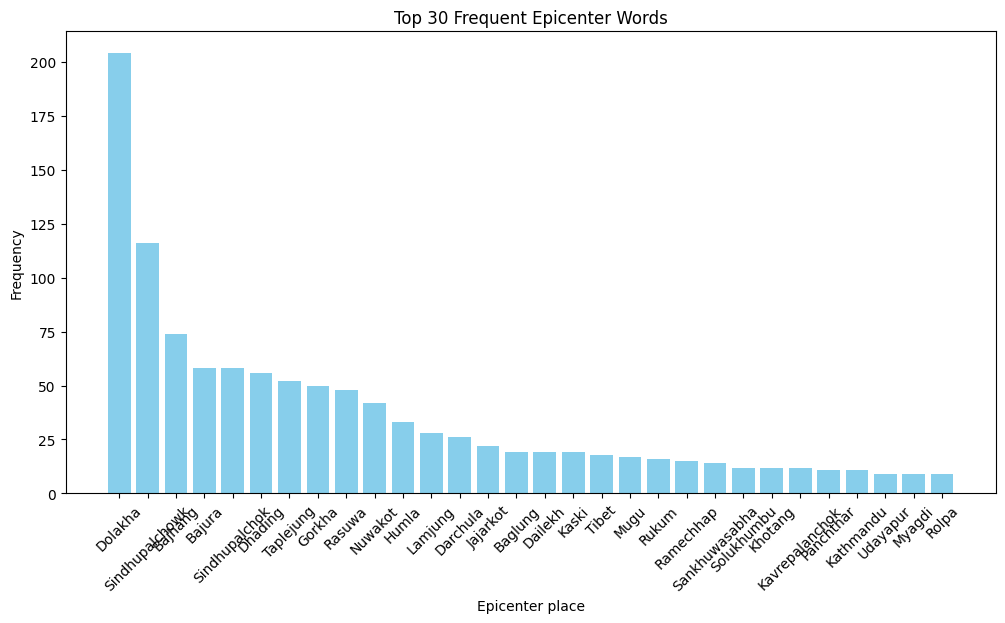

In [235]:
%matplotlib inline

plt.figure(figsize=(12,6))
plt.bar(place_df['Word'], place_df['Frequency'], color="skyblue")
plt.title("Top 30 Frequent Epicenter Words")
plt.xlabel("Epicenter place")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


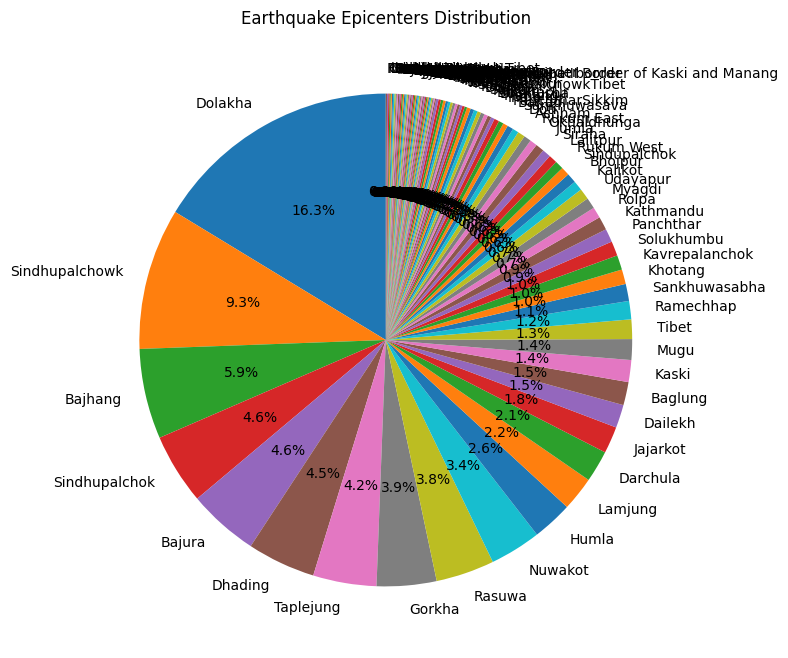

In [236]:
# Count how many times each epicenter appears
epicenter_counts = df['epicenter'].value_counts()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    epicenter_counts.values,               # sizes
    labels=epicenter_counts.index,         # labels
    autopct='%1.1f%%',                     # show percentage
    startangle=90,                         # rotate start
)

plt.title("Earthquake Epicenters Distribution")
plt.show()

In [237]:
df.head(1)

,date,time,latitude,longitude,magnitude,epicenter,BS_date,AD_date,Local_time,UTC_time,AD_UTC,BS_Local,AD_Local,AD_UTC_dt,AD_Local_dt
0,B.S.: 2050-11-24A.D.: 1994-03-08,Local: 07:50UTC: 02:05,29.33,81.83,4.0,Kalikot,11/24/2050,3/8/1994,7:50,2:05,3/8/1994 2:05,11/24/2050 7:50,3/8/1994 7:50,3/8/1994 2:05,3/8/1994 7:50


In [238]:
df.dtypes

date            object
time            object
latitude       float64
longitude      float64
magnitude      float64
epicenter       object
BS_date         object
AD_date         object
Local_time      object
UTC_time        object
AD_UTC          object
BS_Local        object
AD_Local        object
AD_UTC_dt       object
AD_Local_dt     object
dtype: object

In [239]:
import folium
from folium.plugins import MarkerCluster

# Drop rows with missing coordinates
df_map = df.dropna(subset=["latitude", "longitude"]).copy()

# --- Function to get both danger level and color ---
def mag_info(mag):
    """
    Returns danger level and color based on earthquake magnitude.
    """
    if pd.isna(mag):
        return "Unknown", "gray"
    if mag < 2.0:
        return "Micro", "lightgreen"
    elif mag < 4.0:
        return "Minor", "green"
    elif mag < 5.0:
        return "Light", "yellow"
    elif mag < 6.0:
        return "Moderate", "orange"
    elif mag < 7.0:
        return "Strong", "darkorange"
    elif mag < 8.0:
        return "Major", "red"
    elif mag < 9.0:
        return "Great", "darkred"
    else:
        return "Massive", "purple"

# --- Create base map centered on Nepal ---
m = folium.Map(location=[28.2, 84.0], zoom_start=7, tiles="OpenStreetMap")

# --- Add marker cluster ---
cluster = MarkerCluster(name="Earthquakes").add_to(m)

# --- Add circle markers ---
for _, row in df_map.iterrows():
    mag = row.get("magnitude", None)
    level, color = mag_info(mag)
    
    popup_text = f"""
    <b>Epicenter:</b> {row.get('epicenter','N/A')}<br>
    <b>Magnitude:</b> {mag if mag is not None else 'N/A'}<br>
    <b>Danger Level:</b> {level}<br>
    <b>Datetime:</b> {row.get('AD_Local_dt','')}
    """
    tooltip_text = f"{row.get('epicenter','N/A')} — Mag: {mag if mag is not None else 'N/A'}"
    
    # Dynamic radius: exaggerate larger magnitudes
    radius = 4 if pd.isna(mag) else 3 + mag**1.5
    
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=tooltip_text
    ).add_to(cluster)

# --- Add layer control ---
folium.LayerControl().add_to(m)

# --- Add custom legend ---
legend_html = """
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 180px; height: 270px;
    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
    padding: 10px;
">
<b>Earthquake Legend</b><br>
<i style="background:lightgreen;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Micro &lt;2.0<br>
<i style="background:green;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Minor 2.0–3.9<br>
<i style="background:yellow;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Light 4.0–4.9<br>
<i style="background:orange;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Moderate 5.0–5.9<br>
<i style="background:darkorange;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Strong 6.0–6.9<br>
<i style="background:red;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Major 7.0–7.9<br>
<i style="background:darkred;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Great 8.0–8.9<br>
<i style="background:purple;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Massive ≥9.0
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# --- Save map ---
m.save("nepal_earthquakes_map.html")
print("✅ Map saved as nepal_earthquakes_map.html — open in your browser.")


✅ Map saved as nepal_earthquakes_map.html — open in your browser.


This show that high number of earthquack are range form 4.9 - 4.9

In [240]:
df.dtypes

date            object
time            object
latitude       float64
longitude      float64
magnitude      float64
epicenter       object
BS_date         object
AD_date         object
Local_time      object
UTC_time        object
AD_UTC          object
BS_Local        object
AD_Local        object
AD_UTC_dt       object
AD_Local_dt     object
dtype: object

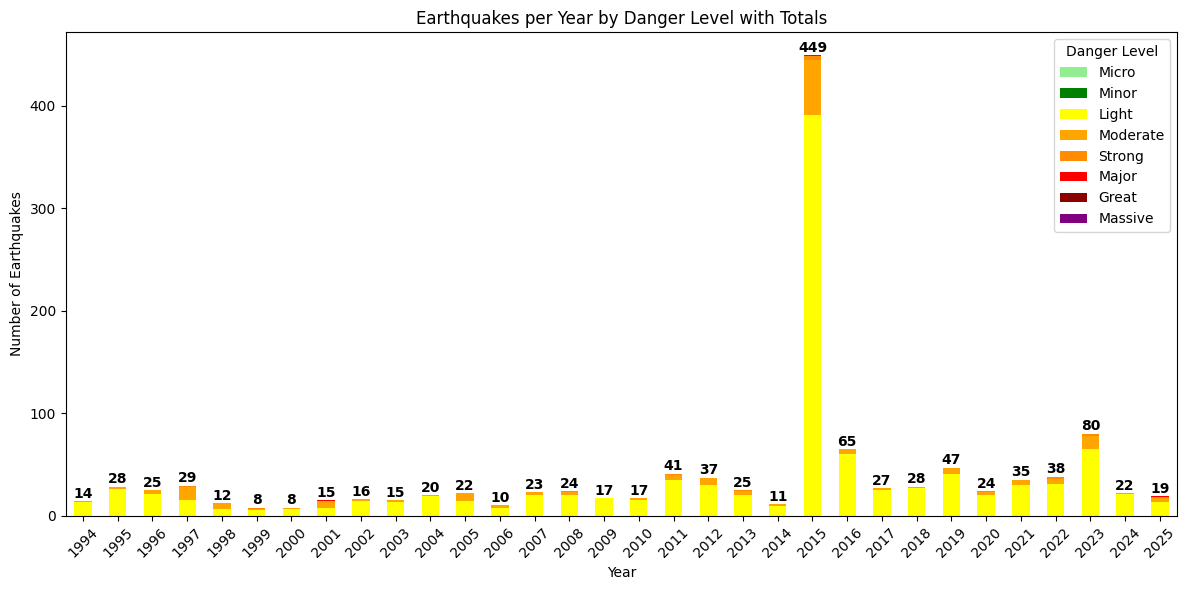

In [241]:
# --- Ensure datetime and extract year ---
df['AD_date'] = pd.to_datetime(df['AD_date'], errors='coerce')
df['year'] = df['AD_date'].dt.year

# --- Categorize magnitudes using mag_info ---
df['danger_level'] = df['magnitude'].apply(lambda x: mag_info(x)[0])

# --- Count per year per danger level ---
count_df = df.groupby(['year', 'danger_level']).size().unstack(fill_value=0)

# --- Add total per year ---
count_df['total'] = count_df.sum(axis=1)

# --- Define order of danger levels ---
danger_order = ["Micro","Minor","Light","Moderate","Strong","Major","Great","Massive"]

# Reindex columns to include all danger levels, even if missing
plot_df = count_df.reindex(columns=danger_order, fill_value=0)

colors = ["lightgreen","green","yellow","orange","darkorange","red","darkred","purple"]

# --- Plot stacked bar chart ---
ax = plot_df.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)

# --- Add total labels on top of bars ---
for i, total in enumerate(count_df['total']):
    ax.text(i, total + 0.5, str(total), ha='center', va='bottom', fontweight='bold')

plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquakes per Year by Danger Level with Totals")
plt.legend(title="Danger Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


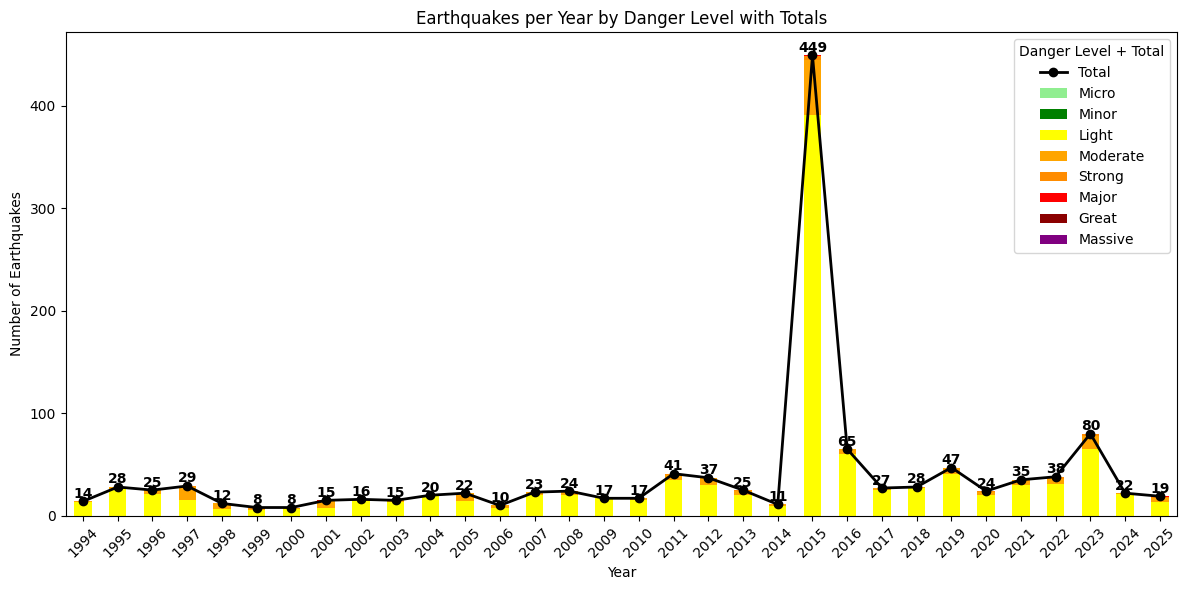

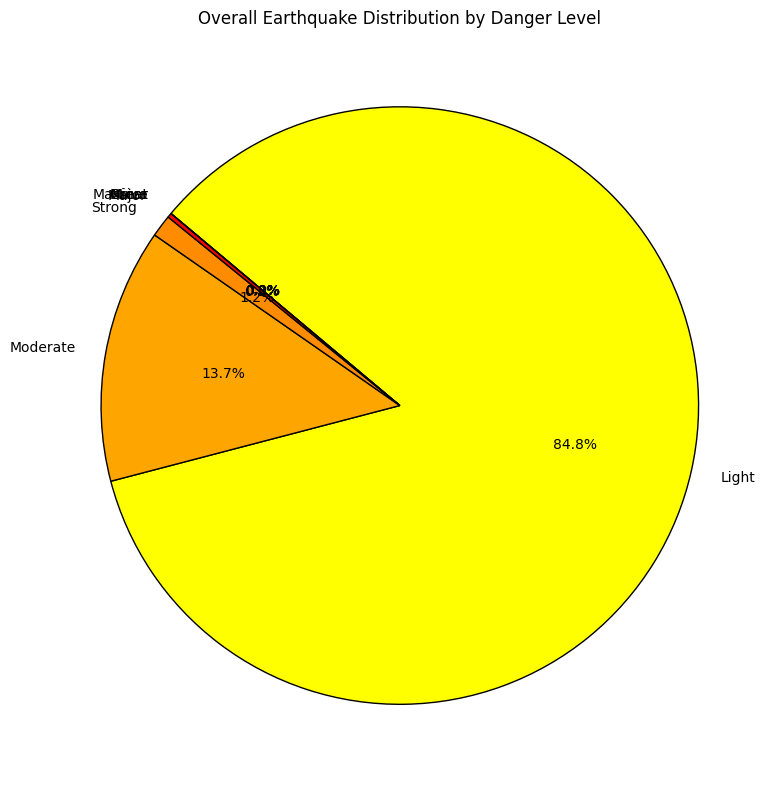

In [242]:

# --- Create dictionary of magnitudes per danger level ---
danger_dict = {
    "Micro": [], "Minor": [], "Light": [], "Moderate": [],
    "Strong": [], "Major": [], "Great": [], "Massive": []
}

for mag in df['magnitude'].values:
    level, color = mag_info(mag)
    if level in danger_dict:
        danger_dict[level].append(mag)

# --- Ensure datetime and extract year ---
df['AD_date'] = pd.to_datetime(df['AD_date'], errors='coerce')
df['year'] = df['AD_date'].dt.year

# --- Categorize magnitudes using mag_info ---
df['danger_level'] = df['magnitude'].apply(lambda x: mag_info(x)[0])

# --- Count per year per danger level ---
count_df = df.groupby(['year', 'danger_level']).size().unstack(fill_value=0)

# --- Ensure all danger levels exist in columns ---
danger_order = ["Micro","Minor","Light","Moderate","Strong","Major","Great","Massive"]
count_df = count_df.reindex(columns=danger_order, fill_value=0)

# --- Add total per year ---
count_df['total'] = count_df.sum(axis=1)

# --- Plot stacked bar chart ---
colors = ["lightgreen","green","yellow","orange","darkorange","red","darkred","purple"]
plot_df = count_df[danger_order]

fig, ax = plt.subplots(figsize=(12,6))
plot_df.plot(kind='bar', stacked=True, color=colors, ax=ax)

# --- Add line plot of totals ---
ax.plot(range(len(count_df)), count_df['total'], color="black", marker="o", linewidth=2, label="Total")

# --- Add total labels on top of bars ---
for i, total in enumerate(count_df['total']):
    ax.text(i, total + 0.5, str(total), ha='center', va='bottom', fontweight='bold')

plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquakes per Year by Danger Level with Totals")
plt.legend(title="Danger Level + Total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Pie chart for overall distribution ---
overall_counts = df['danger_level'].value_counts().reindex(danger_order, fill_value=0)

plt.figure(figsize=(8,8))
plt.pie(overall_counts, labels=overall_counts.index, colors=colors, autopct='%1.1f%%',
        startangle=140, counterclock=False, wedgeprops={'edgecolor':'black'})
plt.title("Overall Earthquake Distribution by Danger Level")
plt.tight_layout()
plt.show()


In [243]:
df.dtypes

date                    object
time                    object
latitude               float64
longitude              float64
magnitude              float64
epicenter               object
BS_date                 object
AD_date         datetime64[ns]
Local_time              object
UTC_time                object
AD_UTC                  object
BS_Local                object
AD_Local                object
AD_UTC_dt               object
AD_Local_dt             object
year                     int32
danger_level            object
dtype: object

In [244]:
# Convert AD_Local_dt to datetime if not already
df['AD_Local_dt'] = pd.to_datetime(df['AD_Local_dt'], errors='coerce')

# Extract hour (0–23)
df['hour'] = df['AD_Local_dt'].dt.hour


In [245]:
df['danger_level'] = df['magnitude'].apply(lambda x: mag_info(x)[0])


In [246]:
# Group by hour and danger level
count_df = df.groupby(['hour', 'danger_level']).size().unstack(fill_value=0)

# Ensure all danger levels exist
danger_order = ["Micro","Minor","Light","Moderate","Strong","Major","Great","Massive"]
count_df = count_df.reindex(columns=danger_order, fill_value=0)

# Add total per hour
count_df['total'] = count_df.sum(axis=1)


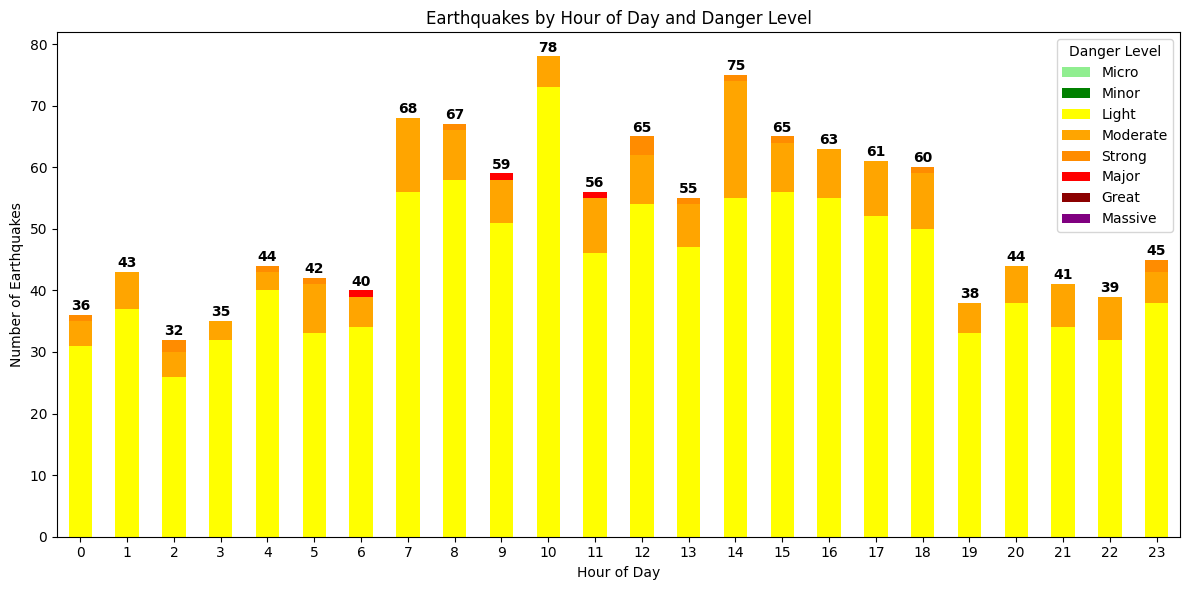

In [247]:

colors = ["lightgreen","green","yellow","orange","darkorange","red","darkred","purple"]
plot_df = count_df[danger_order]  # only danger level columns

ax = plot_df.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)

# Add total labels on top
for i, total in enumerate(count_df['total']):
    ax.text(i, total + 0.3, str(total), ha='center', va='bottom', fontweight='bold')

plt.xlabel("Hour of Day")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquakes by Hour of Day and Danger Level")
plt.xticks(rotation=0)
plt.legend(title="Danger Level")
plt.tight_layout()
plt.show()


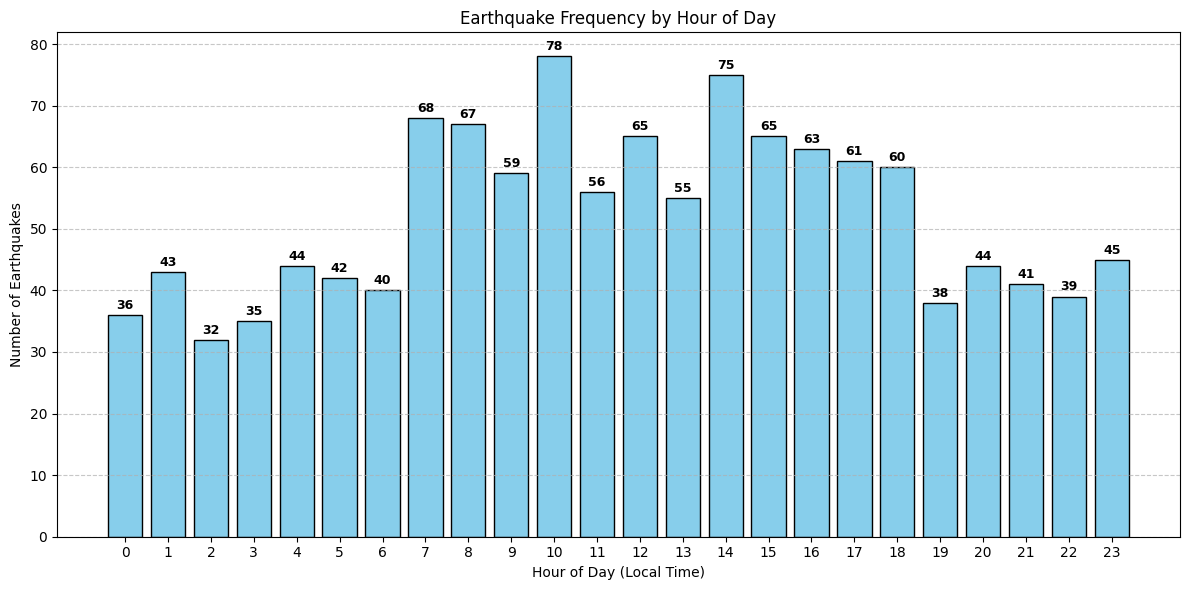

In [248]:
# --- Count earthquakes per hour ---
hour_counts = df['hour'].value_counts().sort_index()

# --- Plot bar chart ---
plt.figure(figsize=(12,6))
bars = plt.bar(hour_counts.index, hour_counts.values, color="skyblue", edgecolor="black")

# Add labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height),
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel("Hour of Day (Local Time)")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquake Frequency by Hour of Day")
plt.xticks(range(0,24))  # 0–23 hours
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

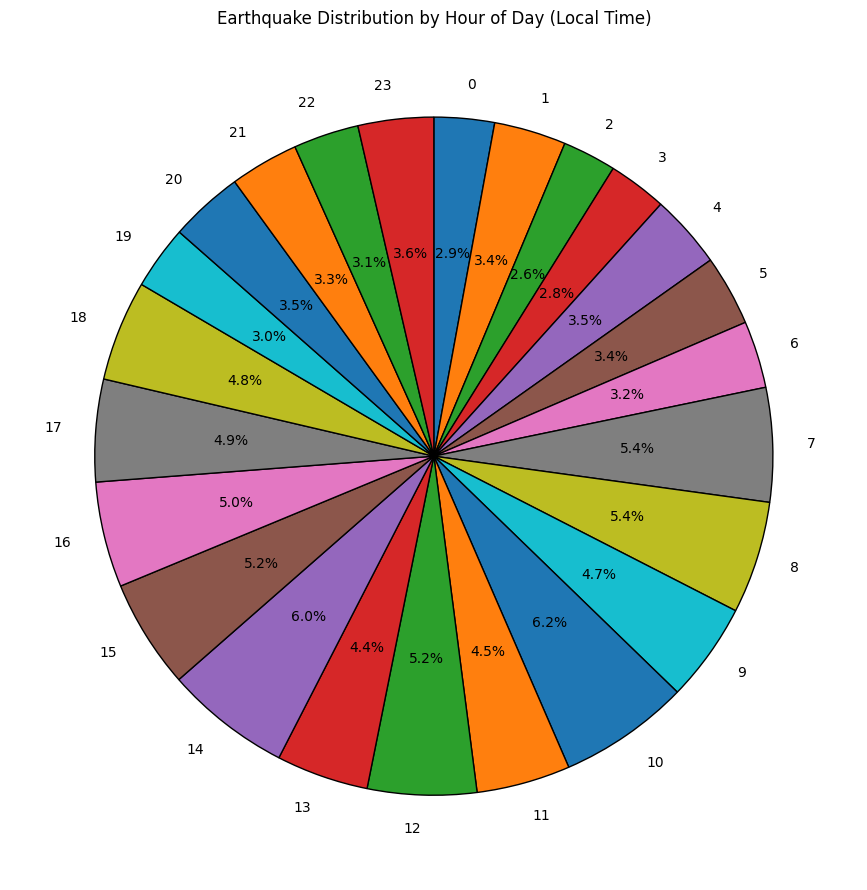

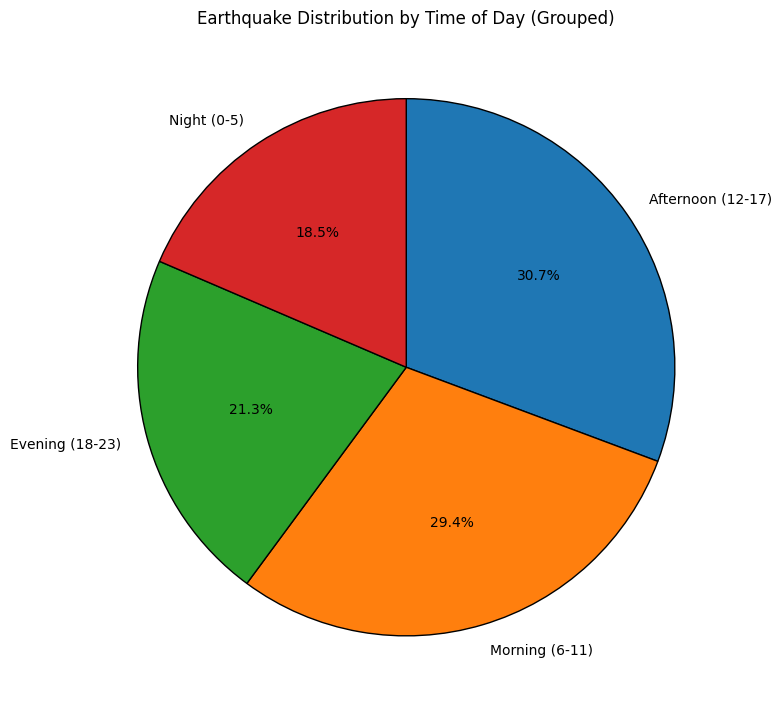

In [249]:
# --- 1. Pie chart per hour ---
hour_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(9,9))
plt.pie(hour_counts, labels=hour_counts.index,
        autopct='%1.1f%%', startangle=90, counterclock=False,
        wedgeprops={'edgecolor':'black'})
plt.title("Earthquake Distribution by Hour of Day (Local Time)")
plt.tight_layout()
plt.show()


# --- 2. Pie chart grouped into time ranges ---
# Define ranges: Night (0-5), Morning (6-11), Afternoon (12-17), Evening (18-23)
def time_range(h):
    if 0 <= h <= 5:
        return "Night (0-5)"
    elif 6 <= h <= 11:
        return "Morning (6-11)"
    elif 12 <= h <= 17:
        return "Afternoon (12-17)"
    else:
        return "Evening (18-23)"

df['time_range'] = df['hour'].apply(time_range)

range_counts = df['time_range'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(range_counts, labels=range_counts.index,
        autopct='%1.1f%%', startangle=90, counterclock=False,
        wedgeprops={'edgecolor':'black'})
plt.title("Earthquake Distribution by Time of Day (Grouped)")
plt.tight_layout()
plt.show()


In [250]:
df['AD_Local_dt'] = pd.to_datetime(df['AD_Local_dt'], errors='coerce')
df['hour'] = df['AD_Local_dt'].dt.hour
df['month'] = df['AD_Local_dt'].dt.month
df['year'] = df['AD_Local_dt'].dt.year


In [251]:
import numpy as np

# From here I start to build model from here

In [252]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df['AD_Local_dt'] = pd.to_datetime(df['AD_Local_dt'], errors='coerce')
df['hour'] = df['AD_Local_dt'].dt.hour

# Define period of day
def period_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['period'] = df['hour'].apply(period_of_day)



X = df[['latitude', 'longitude']]
y = df['period']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf_period = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42
)
clf_period.fit(X_train, y_train)



,n_estimators,500
,criterion,'gini'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [253]:

# --- 1. Prepare data ---
# Ensure datetime
df['AD_Local_dt'] = pd.to_datetime(df['AD_Local_dt'], errors='coerce')
df['hour'] = df['AD_Local_dt'].dt.hour

def mag_category(mag):
    if mag < 2.0:
        return "Micro"
    elif mag < 4.0:
        return "Minor"
    elif mag < 5.0:
        return "Light"
    elif mag < 6.0:
        return "Moderate"
    elif mag < 7.0:
        return "Strong"
    elif mag < 8.0:
        return "Major"
    elif mag < 9.0:
        return "Great"
    else:
        return "Massive"

df['mag_category'] = df['magnitude'].apply(mag_category)

le = LabelEncoder()
df['mag_encoded'] = le.fit_transform(df['mag_category'])


X = df[['latitude', 'longitude']]
y = df['mag_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_mag = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42
)
clf_mag.fit(X_train, y_train)



,n_estimators,500
,criterion,'gini'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [254]:
all_categories = ["Micro", "Minor", "Light", "Moderate", "Strong", "Major", "Great", "Massive"]

# Function for earthquake prediction
def predict_earthquake(lat, lon):
    # --- 1. Prepare input ---
    X_new = np.array([[lat, lon]])
    
    # --- 2. Magnitude prediction ---
    mag_probs = clf_mag.predict_proba(X_new)[0]
    mag_classes = le.inverse_transform(range(len(le.classes_)))
    mag_dict = {cat: mag_probs[mag_classes.tolist().index(cat)] if cat in mag_classes else 0.0 for cat in all_categories}
    max_mag = max(mag_dict, key=mag_dict.get)
    
    # Plot magnitude probabilities
    plt.figure(figsize=(8,4))
    plt.bar(mag_dict.keys(), mag_dict.values(), color="salmon", edgecolor="black")
    plt.ylabel("Probability")
    plt.title(f"Magnitude Prediction at ({lat}, {lon})")
    plt.xticks(rotation=30)
    plt.show()
    
    # --- 3. Period prediction ---
    X_new_period = np.array([[lat, lon]])
    period_probs = clf_period.predict_proba(X_new_period)[0]
    period_classes = clf_period.classes_
    period_dict = {p: p_prob for p, p_prob in zip(period_classes, period_probs)}
    max_period = max(period_dict, key=period_dict.get)
    
    # Plot period probabilities
    plt.figure(figsize=(8,4))
    plt.bar(period_dict.keys(), period_dict.values(), color="skyblue", edgecolor="black")
    plt.ylabel("Probability")
    plt.title(f"Period of Day Prediction at ({lat}, {lon})")
    plt.xticks(rotation=30)
    plt.show()
    
    return {
        "magnitude_probs": mag_dict,
        "predicted_magnitude": max_mag,
        "period_probs": period_dict,
        "predicted_period": max_period
    }


In [255]:
district_coords = {
    "Bhojpur": (27.0844, 87.9778),
    "Dhankuta": (27.0194, 87.3111),
    "Ilam": (27.1250, 87.9078),
    "Jhapa": (26.6667, 88.0000),
    "Khotang": (27.1111, 86.7833),
    "Morang": (26.5000, 87.4167),
    "Okhaldhunga": (27.1833, 86.0833),
    "Panchthar": (27.3333, 87.3333),
    "Sankhuwasabha": (27.3333, 87.3333),
    "Solukhumbu": (27.5833, 86.7167),
    "Sunsari": (26.6667, 87.3333),
    "Taplejung": (27.3333, 88.0000),
    "Terhathum": (27.3333, 87.3333),
    "Udayapur": (26.8667, 86.6667),
    "Bara": (27.0833, 84.9167),
    "Dhanusha": (26.9667, 85.9167),
    "Mahottari": (26.6667, 85.4167),
    "Parsa": (27.0000, 84.0000),
    "Rautahat": (27.0833, 84.5000),
    "Saptari": (26.5000, 86.5000),
    "Sarlahi": (27.0000, 85.5000),
    "Siraha": (26.6667, 86.0000),
    "Bhaktapur": (27.6667, 85.4333),
    "Chitwan": (27.5333, 84.5000),
    "Dhading": (27.8333, 84.1833),
    "Dolakha": (27.9667, 86.0833),
    "Kathmandu": (27.7000, 85.3333),
    "Kavrepalanchok": (27.5833, 85.5000),
    "Lalitpur": (27.6667, 85.3333),
    "Makwanpur": (27.5833, 84.8333),
    "Nuwakot": (27.9333, 85.0833),
    "Ramechhap": (27.8333, 86.0000),
    "Rasuwa": (28.0000, 85.3333),
    "Sindhuli": (27.5833, 85.8333),
    "Sindhupalchok": (27.8333, 85.4167),
    "Baglung": (28.3667, 83.5833),
    "Gorkha": (28.4667, 84.6667),
    "Kaski": (28.2333, 83.9833),
    "Lamjung": (28.3333, 84.4167),
    "Manang": (28.5000, 84.0000),
    "Mustang": (28.8333, 83.8833),
    "Myagdi": (28.3667, 83.5667),
    "Nawalpur": (27.6667, 83.9667),
    "Parbat": (28.2167, 83.5667),
    "Syangja": (27.6667, 83.9667),
    "Tanahun": (27.9667, 84.0167),
    "Arghakhanchi": (27.7500, 83.5000),
    "Banke": (27.1667, 81.6667),
    "Bardiya": (28.0000, 81.6667),
    "Dang": (28.0167, 82.5000),
    "Gulmi": (28.5667, 83.3208),
    "Kapilvastu": (27.3333, 83.3333),
    "Nawalparasi West": (27.5000, 83.5000),
    "Palpa": (27.9667, 83.5000),
    "Pyuthan": (28.0167, 82.8333),
    "Rolpa": (28.3333, 82.8333),
    "Rukum East": (28.5000, 82.5000),
    "Rupandehi": (27.6667, 83.5000),
    "Dailekh": (28.9833, 81.6167),
    "Dolpa": (28.7500, 82.7500),
    "Humla": (30.0000, 81.5000),
    "Jajarkot": (28.1667, 82.5000),
    "Jumla": (29.2667, 82.1667),
    "Kalikot": (29.0000, 81.7500),
    "Mugu": (29.3333, 81.5000),
    "Rukum West": (28.5000, 82.0000),
    "Salyan": (28.5000, 82.2500),
    "Surkhet": (28.5833, 81.6667),
    "Achham": (29.0000, 81.0000),
    "Baitadi": (29.0000, 80.7500),
    "Bajhang": (29.5000, 81.0000),
    "Bajura": (29.5000, 81.2500),
    "Dadeldhura": (29.0000, 80.5000),
    "Darchula": (29.0000, 80.2500),
    "Doti": (29.0000, 80.5000),
    "Kailali": (28.7000, 80.9000),
    "Kanchanpur": (28.9833, 80.5000)
}


In [256]:
len(district_coords)

77

In [257]:

def mag_info(mag):
    """
    Returns danger level and color based on earthquake magnitude.
    """
    if pd.isna(mag):
        return "Unknown", "gray"
    if mag < 2.0:
        return "Micro", "lightgreen"
    elif mag < 4.0:
        return "Minor", "green"
    elif mag < 5.0:
        return "Light", "yellow"
    elif mag < 6.0:
        return "Moderate", "orange"
    elif mag < 7.0:
        return "Strong", "darkorange"
    elif mag < 8.0:
        return "Major", "red"
    elif mag < 9.0:
        return "Great", "darkred"
    else:
        return "Massive", "purple"

# --- Create base map centered on Nepal ---
m_1 = folium.Map(location=[28.2, 84.0], zoom_start=7, tiles="OpenStreetMap")

# --- Add marker cluster ---
cluster_1 = MarkerCluster(name="Earthquakes").add_to(m)

# --- Add circle markers ---
for _, row in df_map.iterrows():
    mag = row.get("magnitude", None)
    level, color = mag_info(mag)
    
    popup_text = f"""
    <b>Epicenter:</b> {row.get('epicenter','N/A')}<br>
    <b>Magnitude:</b> {mag if mag is not None else 'N/A'}<br>
    <b>Danger Level:</b> {level}<br>
    <b>Datetime:</b> {row.get('AD_Local_dt','')}
    """
    tooltip_text = f"{row.get('epicenter','N/A')} — Mag: {mag if mag is not None else 'N/A'}"
    
    # Dynamic radius: exaggerate larger magnitudes
    radius = 4 if pd.isna(mag) else 3 + mag**1.5
    
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=tooltip_text
    ).add_to(cluster_1)

# --- Add layer control ---
folium.LayerControl().add_to(m_1)
for district, (lat, lon) in district_coords.items():
    folium.Marker(
        location=[lat, lon],
        popup=f"<b>{district}</b><br>Lat: {lat}<br>Lon: {lon}",
        tooltip=district,
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m_1)
          
# --- Add custom legend ---
legend_html = """
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 180px; height: 270px;
    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
    padding: 10px;
">
<b>Earthquake Legend</b><br>
<i style="background:lightgreen;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Micro &lt;2.0<br>
<i style="background:green;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Minor 2.0–3.9<br>
<i style="background:yellow;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Light 4.0–4.9<br>
<i style="background:orange;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Moderate 5.0–5.9<br>
<i style="background:darkorange;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Strong 6.0–6.9<br>
<i style="background:red;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Major 7.0–7.9<br>
<i style="background:darkred;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Great 8.0–8.9<br>
<i style="background:purple;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Massive ≥9.0
</div>
"""
m_1.get_root().html.add_child(folium.Element(legend_html))


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


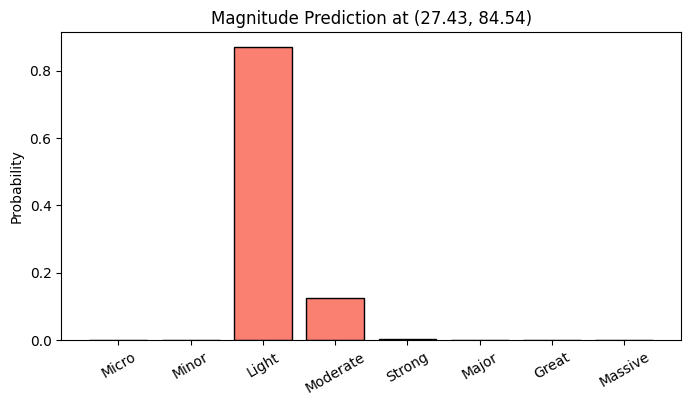

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


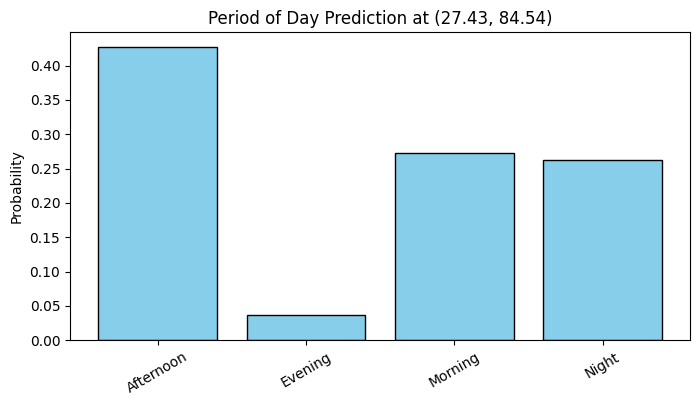

Predicted probabilities per period:
{'Afternoon': 0.43, 'Evening': 0.04, 'Morning': 0.27, 'Night': 0.26}

Predicted probabilities per magnitude category:
{'Micro': 0.0, 'Minor': 0.0, 'Light': 0.87, 'Moderate': 0.13, 'Strong': 0.0, 'Major': 0.0, 'Great': 0.0, 'Massive': 0.0}

Most likely period for next earthquake: Afternoon
Most likely magnitude category: Light
✅ Map with prediction point saved as nepal_earthquakes_map_1.html — open in browser.


In [258]:
try:
    new_lat = float(input("Enter the latitude:  ").strip())
    new_lon = float(input("Enter the longitude:  ").strip())
except ValueError:
    print("⚠️ Invalid input. Using default location (28.2, 84.0).")
    new_lat, new_lon = 28.2, 84.0

# Call the function
result = predict_earthquake(new_lat, new_lon)

# Round probabilities for display
period_time = {p: round(prob, 2) for p, prob in result['period_probs'].items()}
mag_time = {m: round(prob, 2) for m, prob in result['magnitude_probs'].items()}

print("Predicted probabilities per period:")
print(period_time)

print("\nPredicted probabilities per magnitude category:")
print(mag_time)

print(f"\nMost likely period for next earthquake: {result['predicted_period']}")
print(f"Most likely magnitude category: {result['predicted_magnitude']}")






# Generate HTML for period probabilities
period_html = "<br>".join([f"{p}: {prob*100:.2f}%" for p, prob in result['period_probs'].items()])

# Optional: generate HTML for magnitude probabilities
mag_html = "<br>".join([f"{m}: {prob*100:.2f}%" for m, prob in result['magnitude_probs'].items()])

folium.Marker(
    location=[new_lat, new_lon],
    popup=folium.Popup(
        f"<b>Predicted Earthquake Risk</b><br>"
        f"<b>Latitude:</b> {new_lat}<br>"
        f"<b>Longitude:</b> {new_lon}<br><br>"
        f"<b>Predicted probabilities per period:</b><br>{period_html}<br><br>"
        f"<b>Predicted probabilities per magnitude:</b><br>{mag_html}<br><br>"
        f"<b>Most likely Period:</b> {result['predicted_period']}<br>"
        f"<b>Most likely Magnitude:</b> {result['predicted_magnitude']}",
        max_width=300 
    ),
    tooltip="Prediction Point",
    icon=folium.Icon(color="red", icon="star")
).add_to(m_1)

# Save map
m_1.save("nepal_earthquakes_map_1.html")
print("✅ Map with prediction point saved as nepal_earthquakes_map_1.html — open in browser.")

